In [1]:
import quandl
import pandas as pd
import re
import numpy as np
import tqdm
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

### Importing Data

In [2]:
df=pd.read_csv('../1. Data Extraction & Cleaning/df.csv')
df.date=pd.to_datetime(df.date)
df.set_index('date')

,ZABT,ZATT,ZSFH,RSNA,NYTPOP,ACTLISCOU35620,NEWLISCOU35620,PENLISCOU35620,PRIREDCOU35620,NEWY636BPPRIV,...,CUURA101SAR,CUURA101SAF116,CUURA101SAA,CUURA101SANL1,CUURA101SS47016,PSAVERT,MICH,FEDFUNDS,T10Y2Y,T10Y3M
date,,,,,,,,,,,,,,,,,,,,,
2016-08-31,263665.000000,7.639080e+05,421874.000000,2515.697593,19336.456,71440.0,21816.0,9263.0,12840.0,2939.0,...,118.985,254.813,121.576,178.913,194.696,6.8,2.7,0.39,0.79,1.18
2016-09-30,264317.000000,7.653900e+05,422882.000000,2517.262497,19336.456,69427.0,17092.0,9077.0,11850.0,4275.0,...,119.552,254.393,129.847,180.747,188.480,6.8,2.5,0.40,0.78,1.25
2016-10-31,265031.000000,7.670250e+05,423987.000000,2512.303863,19336.456,67715.0,19382.0,8934.0,12878.0,4258.0,...,119.874,254.879,133.232,183.620,190.183,6.8,2.4,0.40,0.83,1.31
2016-11-30,265862.000000,7.689390e+05,425312.000000,2507.025158,19336.456,66569.0,16736.0,8943.0,11808.0,2559.0,...,120.142,255.126,130.743,183.239,192.314,6.9,2.4,0.40,0.98,1.50
2016-12-31,266632.000000,7.709340e+05,426762.000000,2496.784727,19336.456,62162.0,15042.0,9062.0,9930.0,3483.0,...,121.092,256.281,124.428,182.221,202.140,7.0,2.4,0.41,1.26,1.89
2017-01-31,267494.000000,7.730800e+05,428306.000000,2492.825735,19325.115,55645.0,10668.0,8938.0,5872.0,4709.0,...,121.369,254.823,119.924,181.856,202.837,6.5,2.2,0.54,1.25,1.94
2017-02-28,268287.000000,7.751910e+05,429829.000000,2493.577459,19325.115,51426.0,16844.0,8655.0,7174.0,5524.0,...,120.828,253.983,127.022,186.601,209.641,6.9,2.6,0.65,1.26,1.93
2017-03-31,269261.000000,7.777100e+05,431475.000000,2499.800834,19325.115,53539.0,21342.0,8685.0,7404.0,2725.0,...,123.301,254.398,130.424,186.875,207.121,7.2,2.7,0.66,1.14,1.83
2017-04-30,270457.000000,7.808330e+05,433431.000000,2512.312296,19325.115,56343.0,22134.0,9131.0,8902.0,3699.0,...,123.262,254.000,133.045,187.884,204.318,7.2,2.5,0.79,1.13,1.64


### Creating ARIMA Model

In [3]:
import pmdarima as pm
import pandas as pd

# Split data into train and test sets
train_data = df[:len(df)-6]
test_data = df[len(df)-6:]

model = pm.auto_arima(y=train_data['RSNA'], exogenous=train_data[['ZABT','ZSFH','NEWY636FIRE','CUURA101SAF11','CUURA101SS47016', 'MICH']], seasonal=True, m=12, trace=True, error_action='ignore', suppress_warnings=True)

predictions = model.predict(len(test_data), exogenous=test_data[['ZABT','ZSFH','NEWY636FIRE','CUURA101SAF11','CUURA101SS47016', 'MICH']])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=630.127, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=674.506, Time=0.00 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=627.162, Time=0.17 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=649.043, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=679.137, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=625.805, Time=0.03 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=627.195, Time=0.19 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[12] intercept   : AIC=626.334, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=626.696, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=647.401, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=628.130, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[12]             : AIC=624.994, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12]             : AIC=626.241, Time=0.10 sec
 ARIMA(1,1,0)(0,0,1)[12]             

In [4]:
predictions

71    3175.186579
72    3188.225874
73    3197.861901
74    3204.982917
75    3210.245341
76    3214.134267
dtype: float64

In [5]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Evaluate the model using multiple metrics
mse = mean_squared_error(test_data['RSNA'], predictions)
mae = mean_absolute_error(test_data['RSNA'], predictions)
rmse = mean_squared_error(test_data['RSNA'], predictions, squared=False)
mape = np.mean(np.abs((test_data['RSNA'] - predictions) / test_data['RSNA'])) * 100
r2 = r2_score(test_data['RSNA'], predictions)

# Print the metrics
print('MSE:', mse)
print('MAE:', mae)
print('RMSE:', rmse)
print('MAPE:', mape)
print('R2:', r2)

MSE: 11187.213843611078
MAE: 96.21703941527024
RMSE: 105.76962628094645
MAPE: 3.115860855186393
R2: -10.648439180886262


### Using ARIMA Model

In [13]:
# Predict using the test data as exogenous variables
start_index = len(train_data)
end_index = len(train_data) + len(test_data) - 1
predictions, conf_int = model.predict(n_periods=len(test_data), exogenous=test_data[['ZABT', 'ZSFH', 'NEWY636FIRE', 'CUURA101SAF11', 'CUURA101SS47016', 'MICH']], return_conf_int=True)

# Print the predictions and confidence intervals
print(predictions)
print(conf_int)

71    3175.186579
72    3188.225874
73    3197.861901
74    3204.982917
75    3210.245341
76    3214.134267
dtype: float64
[[3135.38040584 3214.99275309]
 [3108.37387703 3268.07787104]
 [3076.82307687 3318.90072542]
 [3043.412028   3366.55380525]
 [3009.64097303 3410.84970845]
 [2976.34790951 3451.92062547]]


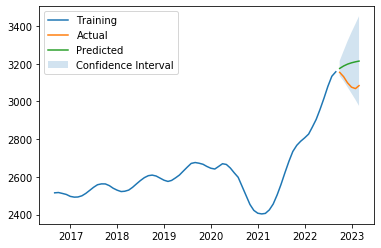

In [11]:
import matplotlib.pyplot as plt

# Plot the actual values, predictions, and confidence intervals
plt.plot(train_data['date'], train_data['RSNA'], label='Training')
plt.plot(test_data['date'], test_data['RSNA'], label='Actual')
plt.plot(test_data['date'], predictions, label='Predicted')
plt.fill_between(test_data['date'], conf_int[:,0], conf_int[:,1], alpha=0.2, label='Confidence Interval')
plt.legend()
plt.show()


### Providing New Data

In [23]:
exog_1= np.array([[367681.3436, 588200.022840, 810.39730, 315.610, 297.364, 3.9]])
exog_1.astype(float)

array([[3.67681344e+05, 5.88200023e+05, 8.10397300e+02, 3.15610000e+02,
        2.97364000e+02, 3.90000000e+00]])

In [24]:
exog_2 = np.array([[370384.9491, 588633.772961, 811.15608, 316.115, 296.949, 4.1]])
exog_2.astype(float)

array([[3.70384949e+05, 5.88633773e+05, 8.11156080e+02, 3.16115000e+02,
        2.96949000e+02, 4.10000000e+00]])

In [26]:
# Generate forecasts for future time periods
forecast_1, confint_1 = model.predict(steps=1, exogenous=exog_1, return_conf_int=True)

In [27]:
print('Prediction:\n', forecast_1)
print('March Upper/Lower Bound:\n',confint_1)

Prediction:
 71    3175.186579
72    3188.225874
73    3197.861901
74    3204.982917
75    3210.245341
76    3214.134267
77    3217.008181
78    3219.132000
79    3220.701501
80    3221.861361
dtype: float64
March Upper/Lower Bound:
 [[3135.38040584 3214.99275309]
 [3108.37387703 3268.07787104]
 [3076.82307687 3318.90072542]
 [3043.412028   3366.55380525]
 [3009.64097303 3410.84970845]
 [2976.34790951 3451.92062547]
 [2943.98771809 3490.02864372]
 [2912.78819453 3525.47580621]
 [2882.84148713 3558.56151501]
 [2854.15933373 3589.56338765]]
